In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [3]:
df = pd.read_csv("../Omar_branch/test.csv")

In [4]:
df = df.drop("beer_id", axis = 1)

In [5]:
df = df.drop("brewery_id", axis = 1)

In [6]:
df2 = df.copy()

In [7]:
df2.head()

,Unnamed: 0,beer_name,beer_style,look,smell,taste,feel,overall,estimated_ibu,availability,abv,brewery_name,city,state,country,types
0,0,Hopper House Double IPA,American Imperial IPA,3.326923,3.346154,3.288462,3.307692,3.307692,83,Year-round,8.0,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"
1,1,Juiceton,Other,4.330000,4.300000,4.330000,4.320000,4.310000,60,Rotating,8.5,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"
2,2,Rauchtabout,Other,3.583333,3.500000,3.500000,3.416667,3.500000,35,Rotating,4.5,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"
3,3,Hat Trick,Other,4.200000,4.200000,4.100000,4.150000,4.200000,60,Rotating,7.0,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"
4,4,Tiny Gypsies,Other,4.500000,4.535714,4.571429,4.464286,4.571429,60,Rotating,6.5,Spindletap Brewery,Houston,TX,US,"Brewery, Bar"


In [9]:
df_name = df2.beer_name
#df_eng_name = df2["English name"]
df_style = df2["beer_style"]
df2.drop(["beer_name", "beer_style"], axis=1, inplace=True)
df2 = pd.get_dummies(df2)

In [10]:
df2.head()

,Unnamed: 0,look,smell,taste,feel,overall,estimated_ibu,abv,availability_Fall,availability_Rotating,...,state_TX,country_US,types_Brewery,"types_Brewery, Bar","types_Brewery, Bar, Beer-to-go","types_Brewery, Bar, Eatery","types_Brewery, Bar, Eatery, Beer-to-go","types_Brewery, Bar, Homebrew, Beer-to-go","types_Brewery, Eatery","types_Brewery, Eatery, Beer-to-go"
0,0,3.326923,3.346154,3.288462,3.307692,3.307692,83,8.0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,1,4.330000,4.300000,4.330000,4.320000,4.310000,60,8.5,0,1,...,1,1,0,1,0,0,0,0,0,0
2,2,3.583333,3.500000,3.500000,3.416667,3.500000,35,4.5,0,1,...,1,1,0,1,0,0,0,0,0,0
3,3,4.200000,4.200000,4.100000,4.150000,4.200000,60,7.0,0,1,...,1,1,0,1,0,0,0,0,0,0
4,4,4.500000,4.535714,4.571429,4.464286,4.571429,60,6.5,0,1,...,1,1,0,1,0,0,0,0,0,0


In [11]:
df3 = df2.copy()
df3["beer_name"] = df_name
df3["style"] = df_style

In [12]:
df3.head()

,Unnamed: 0,look,smell,taste,feel,overall,estimated_ibu,abv,availability_Fall,availability_Rotating,...,types_Brewery,"types_Brewery, Bar","types_Brewery, Bar, Beer-to-go","types_Brewery, Bar, Eatery","types_Brewery, Bar, Eatery, Beer-to-go","types_Brewery, Bar, Homebrew, Beer-to-go","types_Brewery, Eatery","types_Brewery, Eatery, Beer-to-go",beer_name,style
0,0,3.326923,3.346154,3.288462,3.307692,3.307692,83,8.0,0,0,...,0,1,0,0,0,0,0,0,Hopper House Double IPA,American Imperial IPA
1,1,4.330000,4.300000,4.330000,4.320000,4.310000,60,8.5,0,1,...,0,1,0,0,0,0,0,0,Juiceton,Other
2,2,3.583333,3.500000,3.500000,3.416667,3.500000,35,4.5,0,1,...,0,1,0,0,0,0,0,0,Rauchtabout,Other
3,3,4.200000,4.200000,4.100000,4.150000,4.200000,60,7.0,0,1,...,0,1,0,0,0,0,0,0,Hat Trick,Other
4,4,4.500000,4.535714,4.571429,4.464286,4.571429,60,6.5,0,1,...,0,1,0,0,0,0,0,0,Tiny Gypsies,Other


In [13]:
first_column = df3.pop('beer_name')
df3.insert(0, 'beer_name', first_column)

second_column = df3.pop('style')
df3.insert(3, 'style', second_column)

2428 unique beers

In [14]:
# Output File (CSV)
output_data_file = "beer_rec2.csv"

In [15]:
# Export to CSV
df3.to_csv(output_data_file,index=False)

In [16]:
# to find beer if user knows the beer name
def get_recommended(df, beer_name, n_neighbors=10):
    df_sub = df.drop(["beer_name", "style"], axis=1)
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    beer = df.loc[df["beer_name"] == beer_name]
    beer = beer.drop(["beer_name", "style"], axis=1)
    beer = beer.to_numpy()
    distances, indices = model_knn.kneighbors(beer, n_neighbors = n_neighbors)
    result = df.iloc[indices.flatten()]
    result["Distance"] = distances.flatten()
    return result

In [17]:
# Run this cell to get recommended anime
df_result = get_recommended(df3, "Smash And Grab") # df3 is the reference table so no need to change; change second value

/Users/zahero/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/var/folders/y_/t4sv1wpj5wd8d8ykf9w219r80000gn/T/ipykernel_76447/4055398202.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Distance"] = distances.flatten()


In [18]:
df_result.head(20)

,beer_name,Unnamed: 0,look,style,smell,taste,feel,overall,estimated_ibu,abv,...,country_US,types_Brewery,"types_Brewery, Bar","types_Brewery, Bar, Beer-to-go","types_Brewery, Bar, Eatery","types_Brewery, Bar, Eatery, Beer-to-go","types_Brewery, Bar, Homebrew, Beer-to-go","types_Brewery, Eatery","types_Brewery, Eatery, Beer-to-go",Distance
1888,Smash And Grab,1888,3.690000,American IPA,3.650000,3.620000,3.600000,3.650000,60,6.2,...,1,0,0,1,0,0,0,0,0,0.000000e+00
1895,Presumed Innocent,1895,3.463235,American IPA,3.169118,3.110294,3.220588,3.169118,60,7.2,...,1,0,0,1,0,0,0,0,0,5.544354e-07
1866,Rapid Scorpion India Session Ale,1866,3.500000,American IPA,3.600000,3.550000,3.550000,3.500000,60,5.8,...,1,0,0,0,1,0,0,0,0,9.411181e-07
1876,IPA,1876,3.446429,American IPA,3.339286,3.089286,3.375000,3.250000,60,6.5,...,1,1,0,0,0,0,0,0,0,9.642672e-07
1921,HazUice,1921,3.750000,American IPA,3.583333,3.750000,3.750000,3.750000,60,6.4,...,1,0,1,0,0,0,0,0,0,9.805380e-07
1897,Hopostle,1897,3.730000,American IPA,3.710000,3.730000,3.740000,3.670000,60,7.2,...,1,1,0,0,0,0,0,0,0,9.824565e-07
1861,Kung Fu Grip,1861,3.750000,American IPA,3.750000,3.812500,3.750000,3.750000,60,6.5,...,1,0,0,0,1,0,0,0,0,1.003915e-06
1911,Hydro Thunder IPA,1911,3.916667,American IPA,3.833333,4.000000,3.833333,3.916667,60,7.3,...,1,0,1,0,0,0,0,0,0,1.081587e-06
1949,Baby Legs,1949,4.041667,American IPA,4.041667,3.958333,4.000000,4.000000,60,6.0,...,1,0,0,1,0,0,0,0,0,1.099627e-06
1848,Cosmic Flotsam,1848,3.863636,American IPA,3.863636,3.954545,3.909091,3.886364,60,6.5,...,1,0,1,0,0,0,0,0,0,1.205058e-06


In [19]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1888 to 1848
Columns: 315 entries, beer_name to Distance
dtypes: float64(7), int64(2), object(2), uint8(304)
memory usage: 3.9+ KB


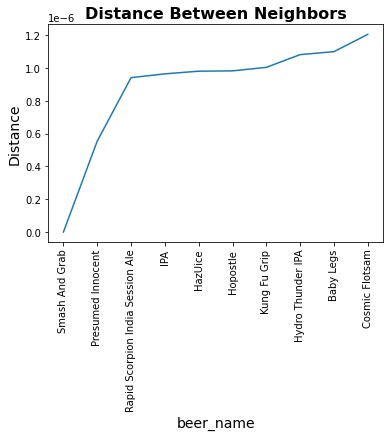

In [20]:
# plt.figure(figsize=(8,6))
# fig = plt.figure()
plt.plot(df_result["beer_name"], df_result["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("beer_name", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
# plt.show()
plt.savefig('graph01.png', bbox_inches = "tight")

In [21]:
# to find anime if user knows nothing about anime and wants to use genre and review score
def get_recommended_genre(df, style, abv=0, n_neighbors=10):
    
    # explain metric hyper-parm in writeup
    df_sub = df.drop(["beer_name", "style", "abv"], axis=1)
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    
    anime = df.loc[(df["style"] == style) & (df.abv > abv)].sample(1)
    anime = anime.drop(["beer_name", "style", "abv"], axis=1)
    anime = anime.to_numpy()
    
    distances, indices = model_knn.kneighbors(anime, n_neighbors = n_neighbors)
    
    result = df.iloc[indices.flatten()]
    result["Distance"] = distances.flatten()
#     result = result[["Name", "English name", "Score", "Genres"]]
    
    return result

In [22]:
# Run this cell to get recommended anime
df_result2 = get_recommended_genre(df3, "American IPA", 6.5) # df3 is the reference table so no need to change; change second and third values

/Users/zahero/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/var/folders/y_/t4sv1wpj5wd8d8ykf9w219r80000gn/T/ipykernel_76447/3735994038.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Distance"] = distances.flatten()


In [23]:
df_result2.head()

,beer_name,Unnamed: 0,look,style,smell,taste,feel,overall,estimated_ibu,abv,...,country_US,types_Brewery,"types_Brewery, Bar","types_Brewery, Bar, Beer-to-go","types_Brewery, Bar, Eatery","types_Brewery, Bar, Eatery, Beer-to-go","types_Brewery, Bar, Homebrew, Beer-to-go","types_Brewery, Eatery","types_Brewery, Eatery, Beer-to-go",Distance
585,Who's Got The Juice Now,585,3.888889,American IPA,4.055556,4.000000,3.888889,3.944444,60,7.5,...,1,0,0,1,0,0,0,0,0,0.000000e+00
586,DDH Who's Got the Juice Now,586,4.083333,American IPA,4.166667,4.250000,4.083333,4.166667,60,7.6,...,1,0,0,1,0,0,0,0,0,2.844628e-07
583,Spottieottiehopalicious,583,3.833333,American IPA,3.708333,3.416667,3.625000,3.458333,60,7.5,...,1,0,0,1,0,0,0,0,0,1.114288e-06
596,SMASH IPA - Pride Of Ringwood,596,4.250000,American IPA,4.500000,4.500000,4.500000,4.500000,60,6.9,...,1,0,0,1,0,0,0,0,0,8.719714e-06
580,Good Clean Fun,580,4.000000,Other,4.000000,4.200000,4.050000,4.150000,60,6.6,...,1,0,1,0,0,0,0,0,0,9.380689e-06


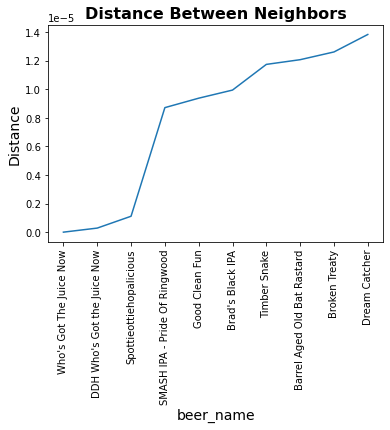

In [24]:
# plt.figure(figsize=(10,6))
plt.plot(df_result2["beer_name"], df_result2["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("beer_name", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
plt.show()